In [1]:
import sys
import os
cwd = os.getcwd()
sys.path.append('C:\\Users\\bclamber\\Desktop\\pints')
from __future__ import print_function
import pints
import pints.toy as toy
import pints._diagnostics as diagnostics
import numpy as np
import matplotlib.pyplot as plt

# Load a forward model
model = toy.LogisticModel()

# Create some toy data
real_parameters = [0.015, 500]
times = np.linspace(0, 1000, 100)
org_values = model.simulate(real_parameters, times)

# Add noise
noise = 10
values = org_values + np.random.normal(0, noise, org_values.shape)
real_parameters = np.array(real_parameters + [noise])

# Get properties of the noise sample
noise_sample_mean = np.mean(values - org_values)
noise_sample_std = np.std(values - org_values)

# Create an object with links to the model and time series
problem = pints.SingleSeriesProblem(model, times, values)

# Create a log-likelihood function (adds an extra parameter!)
log_likelihood = pints.UnknownNoiseLogLikelihood(problem)

# Create a uniform prior over both the parameters and the new noise variable
prior = pints.UniformPrior(
    [0.01, 400, noise*0.1],
    [0.02, 600, noise*100]
    )

# Create a Bayesian (un-normalised) log-posterior (prior * likelihood)
log_posterior = pints.LogPosterior(prior, log_likelihood)

# Create a Population MCMC routine (uses parallel tempering)
x0 = real_parameters
mcmc = pints.PopulationMCMC(log_posterior, x0)

# Use 20000 iterations in total
mcmc.set_iterations(20000)

# Use 5 different temperatures
#mcmc.set_num_temperatures(5)

# Disable verbose mode
mcmc.set_verbose(False)

# Run!
print('Running...')
chain = mcmc.run()
print('Done!')

Running...
Done!


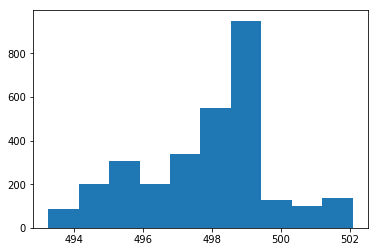

In [5]:
plt.hist(chain[4][:,1])
plt.show()

In [6]:
print(np.std(chain[0][:,2]))
print(np.std(chain[4][:,2]))

0.573390763773
0.552325459414


In [20]:
chain

[array([[  1.71174364e-02,   4.92996563e+02,   2.54264223e+01],
        [  1.71174364e-02,   4.92996563e+02,   2.54264223e+01],
        [  1.71174364e-02,   4.81346217e+02,   2.54264223e+01],
        ..., 
        [  1.71174364e-02,   5.02606055e+02,   1.34402970e+01],
        [  1.71174364e-02,   5.02606055e+02,   1.34402970e+01],
        [  1.71174364e-02,   5.02606055e+02,   1.34402970e+01]]),
 array([[  1.71174364e-02,   4.92996563e+02,   2.49277596e+01],
        [  1.71174364e-02,   4.92996563e+02,   2.49277596e+01],
        [  1.71174364e-02,   4.92996563e+02,   2.49277596e+01],
        ..., 
        [  1.71174364e-02,   5.02606055e+02,   1.34402970e+01],
        [  1.71174364e-02,   5.02606055e+02,   1.34402970e+01],
        [  1.71174364e-02,   5.02606055e+02,   1.34402970e+01]]),
 array([[  1.58438242e-02,   4.92996563e+02,   2.49277596e+01],
        [  1.58438242e-02,   4.92996563e+02,   2.49277596e+01],
        [  1.58438242e-02,   4.92996563e+02,   2.49277596e+01],
        

In [27]:
i,j = np.random.choice(5,2,replace=False)

In [28]:
i

0

In [4]:
0.005 * 10**2

0.5

In [31]:
[1,1,0.5]==[1,1,1]

False

In [34]:
np.where(np.array([1,1,1])==1)

(array([0, 1, 2], dtype=int64),)

In [2]:
import sys
import os
cwd = os.getcwd()

In [3]:
cwd

'C:\\Users\\bclamber\\Desktop\\pints\\examples'

In [47]:
test[:, [0], :].shape[0]

4

In [15]:
sigma = []
for i in range(5):
    sigma.append(np.diag([1,2,3]))

In [16]:
sigma

[array([[1, 0, 0],
        [0, 2, 0],
        [0, 0, 3]]), array([[1, 0, 0],
        [0, 2, 0],
        [0, 0, 3]]), array([[1, 0, 0],
        [0, 2, 0],
        [0, 0, 3]]), array([[1, 0, 0],
        [0, 2, 0],
        [0, 0, 3]]), array([[1, 0, 0],
        [0, 2, 0],
        [0, 0, 3]])]

In [17]:
sigma[0]

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])